# **Red Wine Quality**

**About this dataset**

#####Content

This dataset can be used to explore correlations between chemical properties (like acidity, sulfur dioxide levels, and alcohol content) and the quality of the wine. However, further analysis would be needed to establish stronger relationships and predictions regarding the quality of wine based on its chemical composition.




##Input Variables


The input variables for wine quality prediction using machine learning are based on physicochemical tests that are laboratory-based. As such, the success of a wine quality prediction ML model depends on the correct understanding of both red and white wine physicochemical properties. Let’s see what wine data is used for quality prediction, with a handful of interesting facts for each data attribute:

* Fixed acidity. The predominant fixed acids in wine, such as tartaric, succinic, citric, and malic acids.


* Volatile acidity. The high acetic acid present in wine, which causes an unpleasant vinegar taste.


* Citric acid. A weak organic acid used to increase the freshness and flavor of wine.


* Residual sugar. The amount of sugar left after fermentation.


* Chlorides. The amount of salt in wine. The lower chloride rate creates better quality wines.


* Free sulfur dioxide. SO2 is used for preventing wine from oxidation and microbial spoilage.


* Total sulfur dioxide. The amount of free and bound forms of SO2.


* Density. Depends on the alcohol and sugar content. Better wines usually have lower densities.


* pH. Used to check the level of acidity or alkalinity of wine.


* Sulfates. An antibacterial and antioxidant agent added to wine.


* Alcohol. The percentage of alcohol in wine. A higher concentration leads to better quality.

* Quality. (score between 0 and 10)




-The output variable is, therefore, the quality rating of wine that is based on sensory data and scores from 0 to 10.

##Wine Quality Prediction Model: Process Overview


The main steps for building a machine learning model to predict the quality of wine include:

1) Importing the libraries.


2) Accessing and importing the wine quality datasets into a dataframe.


3) Analyzing and processing wine data:


* Checking for null values.

* Analyzing the correlation between the variables.

* Converting data to binary categories.

* Splitting features and labels.

* Normalizing the features.

* Splitting training (for model training) and testing data (for predictions).


4) Constructing an ML model:


* Model fitting.

* Model prediction.

* Model testing.

* Cross-validation.

5) Implementing different classification approaches to the prepared wine dataset:


* Evaluating model performance based on classification scores.

* Calculating the classification accuracy score.

* Assessing the results.

6) Analyzing feature importance.

7) Drawing conclusions and selecting the best classification method.


**Import the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import the dataset**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/project/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
print("Summary statistics")
print(df.describe())

Summary statistics
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000           

In [6]:
df.info()
#is used to check the information about the data and the datatypesof each respective attribute.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.shape

(1599, 12)

In [8]:
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


* High quality value --> better quality of wine


* You can see that there are lots of samples of average wines than good or the poor quality ones.


* Many examples with quality = 5 or 6

In [9]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**Analysis Outputs**

* The dataset consists of 1599 rows and 12 columns, with features like acidity, alcohol content, pH, and sulfur dioxide levels.


* No missing values were found, as verified by the isnull().sum() method.


* Basic statistical summary (df.describe()) was used to observe the range and distribution of numerical features.

**Since there are no null values we can move ahead with the EDA.**

#**Data visualisation**


* Enables to understand features and their relationship among themselves and with output label.


In [10]:
df = df.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide'})
print(df)


      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  

In [11]:
df.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1161,8.8,0.45,0.43,1.4,0.076,12.0,21.0,0.99551,3.21,0.75,10.2,6
1458,8.4,0.29,0.40,1.7,0.067,8.0,20.0,0.99603,3.39,0.60,10.5,5
1574,5.6,0.31,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6
290,8.7,0.52,0.09,2.5,0.091,20.0,49.0,0.99760,3.34,0.86,10.6,7
203,7.0,0.42,0.35,1.6,0.088,16.0,39.0,0.99610,3.34,0.55,9.2,5


In [12]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

<ipython-input-13-d4eb96734181>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='quality', data = df, kind = 'count',palette = 'pink')


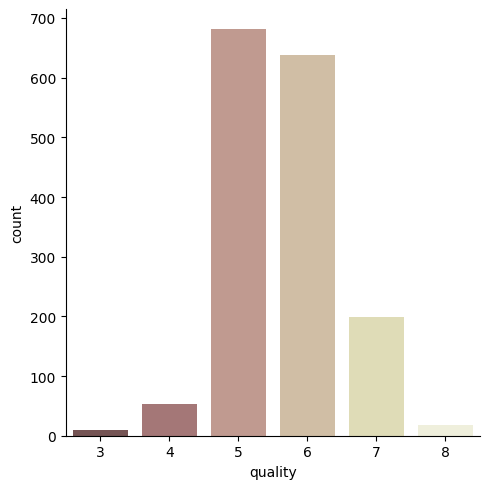

In [13]:
# number of values for each quality
sns.catplot(x='quality', data = df, kind = 'count',palette = 'pink')

**Correlation matrix**

A correlation matrix is helpful for identifying relationships between features. Features that correlate highly with each other might indicate redundancy, and features that correlate with the target variable (quality) are particularly interesting.

In [14]:
corr_matrix = df.corr()
corr_matrix['quality'].sort_values(ascending=False)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric_acid,0.226373
fixed_acidity,0.124052
residual_sugar,0.013732
free_sulfur_dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


In [15]:
df = df.drop('free_sulfur_dioxide', axis = 1)
df = df.drop('pH', axis = 1)
df = df.drop('total_sulfur_dioxide', axis = 1)
df = df.drop('chlorides', axis = 1)
df = df.drop('density', axis = 1)
df = df.drop('volatile_acidity', axis = 1)

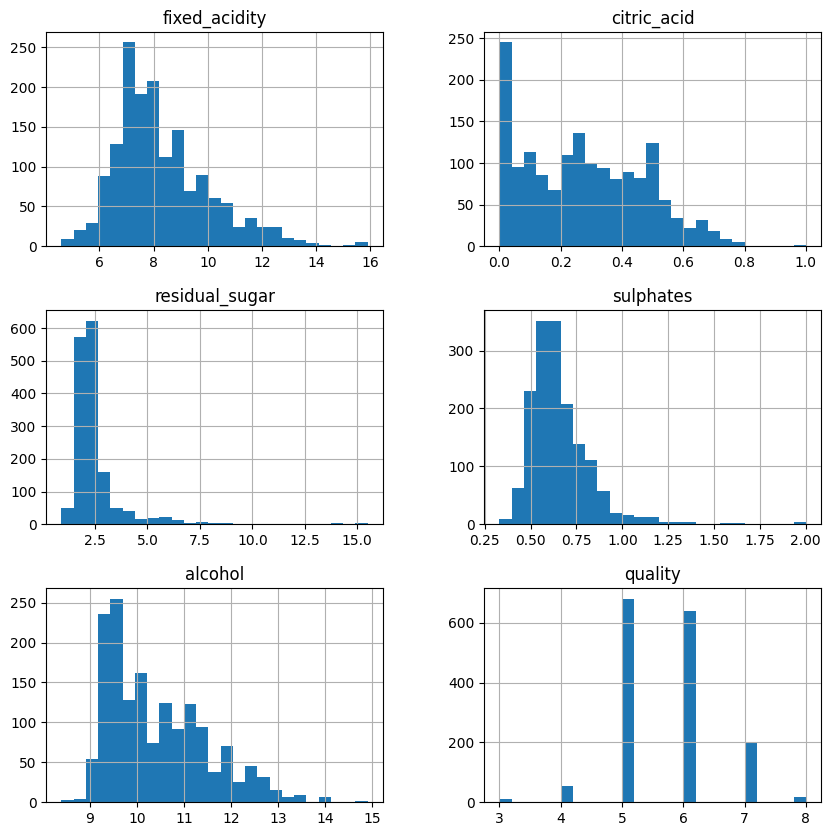

In [16]:
df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

Text(0, 0.5, 'alcohol')

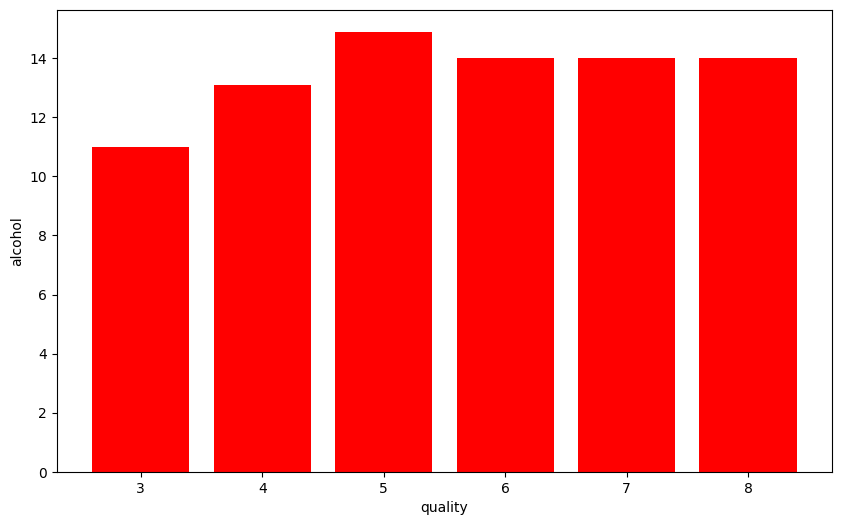

In [17]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='red')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')


<Axes: >

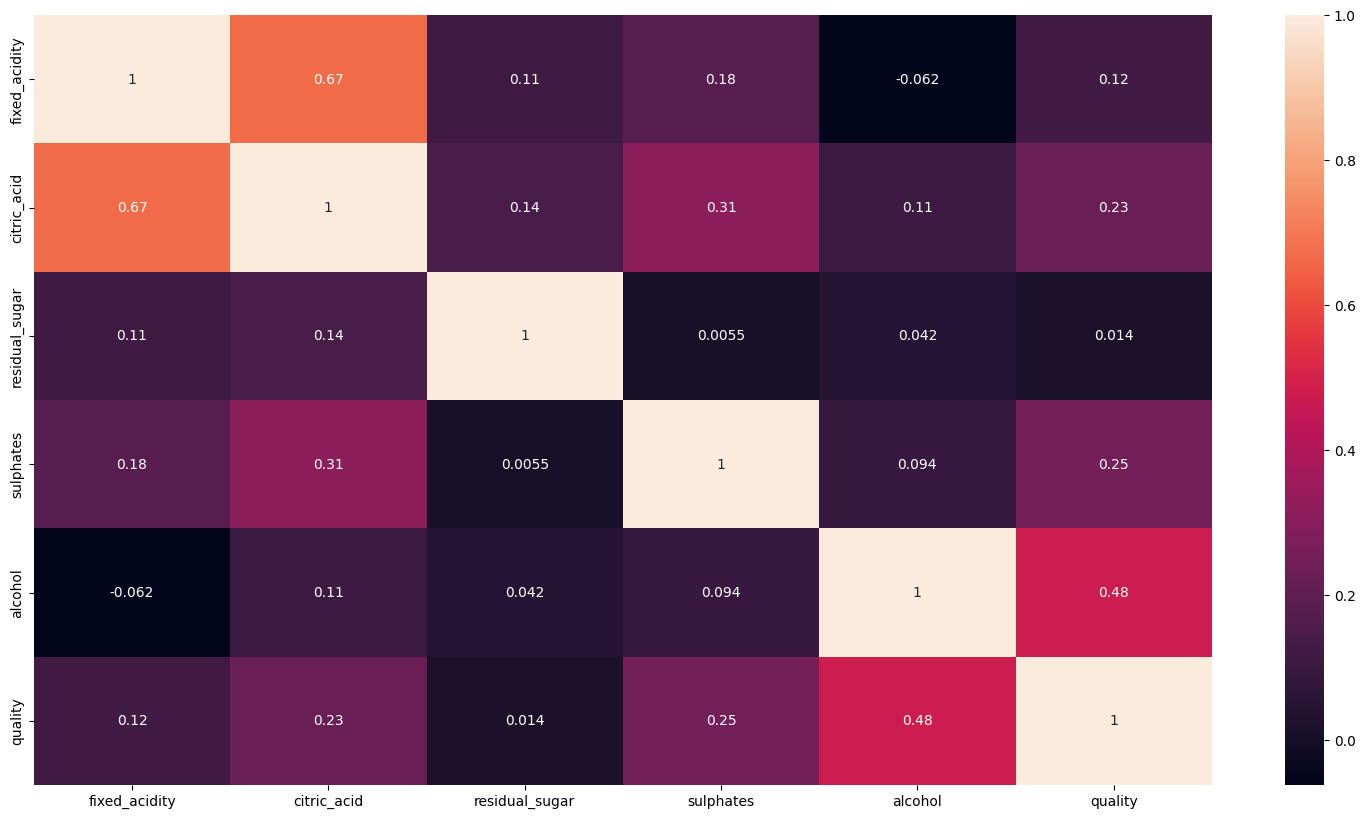

In [18]:
# ploting heatmap
import seaborn as sb # Import seaborn with the alias 'sb'
plt.figure(figsize=[19,10])
sb.heatmap(df.corr(),annot=True)

1. Acidity and density are correlated
2. Fixed acidity correlated to citric acid and density.
3. Fixed acidity is negatively correlated to pH.
4. Citric acid and volatice acidity are negatively correlated.
5. Obvious - total sulfur dioxide and free sulfur dioxide are correlated.

one can observe that some features are strongly correlated to wine quality, which means they play the most pivotal role in the ML model. The top three features are alcohol, volatile acidity, and sulfates.

Now, we have to find those features that are fully correlated to each other by this we reduce the number of features from the data.

If you think that why we have to discard those correlated, because relationship among them is equal they equally impact on model accuracy so, we delete one of them.



In [19]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)


Here we write a python program with that we find those features whose correlation number is high, as you see in the program we set the correlation number greater than 0.7 it means if any feature has a correlation value above 0.7 then it was considered as a fully correlated feature, at last, we find the feature total sulfur dioxide which satisfy the condition.



So, we drop that feature



**Details to see quality of wine other characters using pairplot**

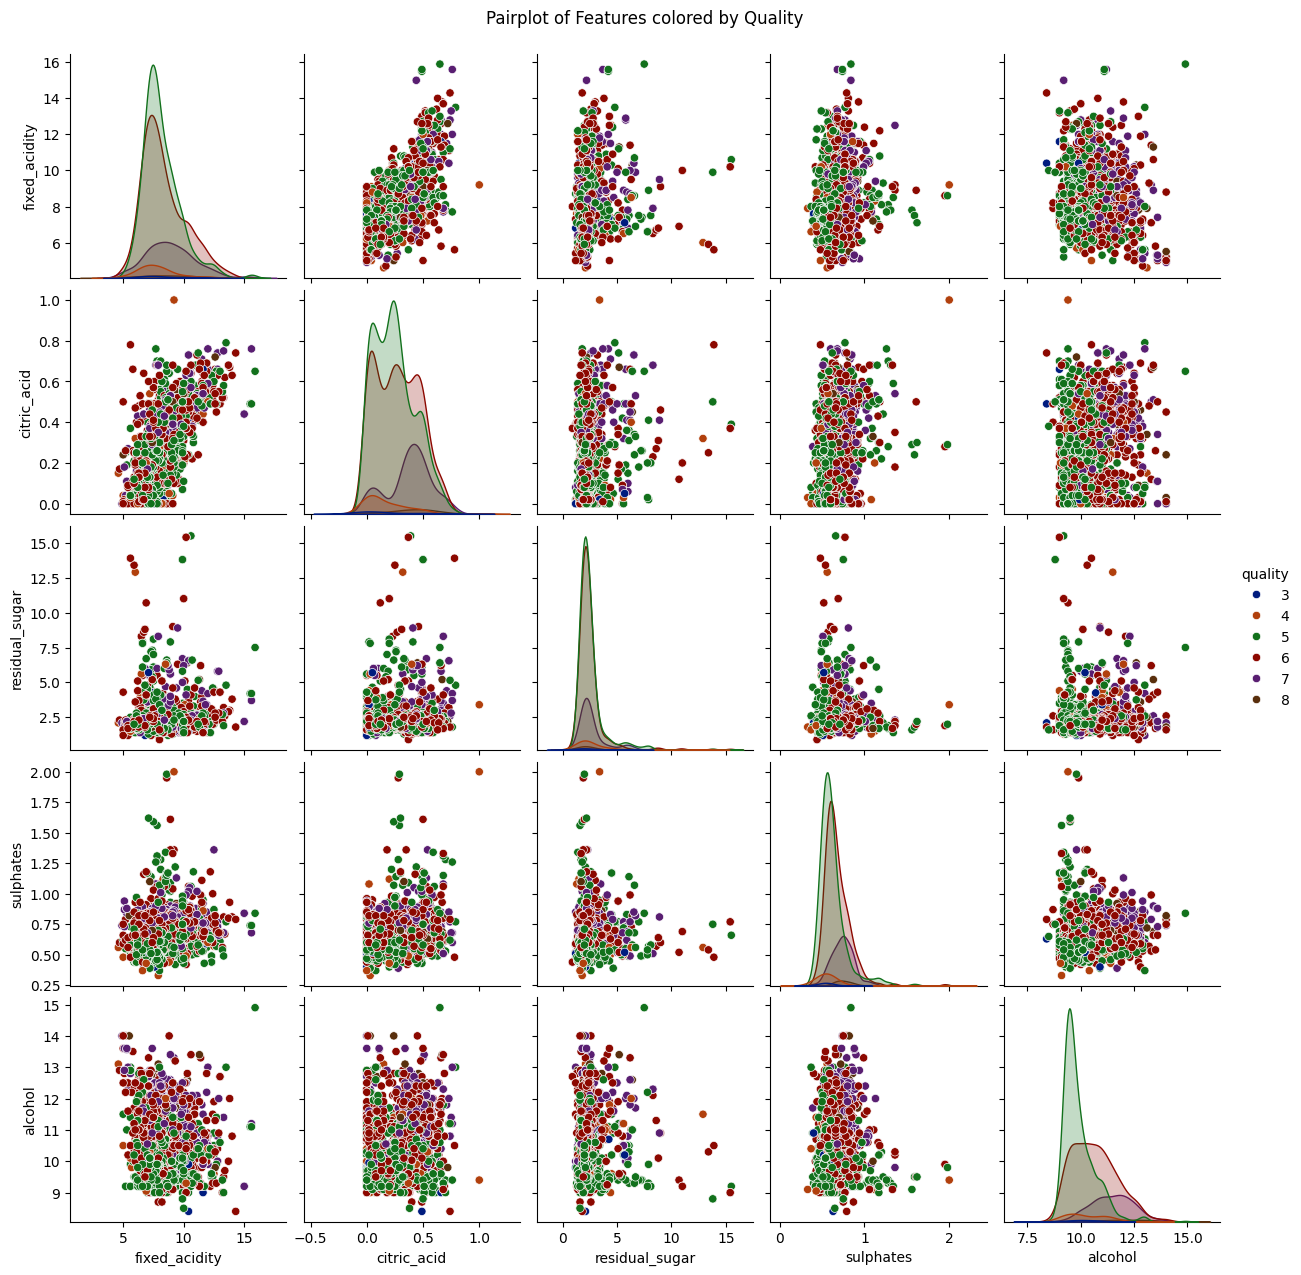

In [22]:
sns.pairplot(df, hue='quality',palette = 'dark')
plt.suptitle('Pairplot of Features colored by Quality',y=1.02)
plt.show()


**Analysis Output**

-**Distribution of Wine Quality**:

A count plot was used to visualize the distribution of the quality variable.This helps us see the most common wine quality scores in the dataset.


-**Correlation Matrix:**

The correlation between the different features and the quality variable was visualized using a heatmap. Key observations included:


*  Fixed acidity and citric acid were strongly positively correlated.

*  Alcohol content showed a positive correlation with wine quality.

    
* Total sulfur dioxide and free sulfur dioxide were highly correlated.


-**Pairplot:**
When examining pairwise relationships between features and quality, we see clear trends, such as the increase in alcohol content correlating with better wine quality.

**Alcohol quantity vs wine quality**

Next, we can examine how wine quality correlates with individual features. For instance, let's look at the relationship between alcohol content and quality:

<ipython-input-23-ab2a3f746de8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette='pink')


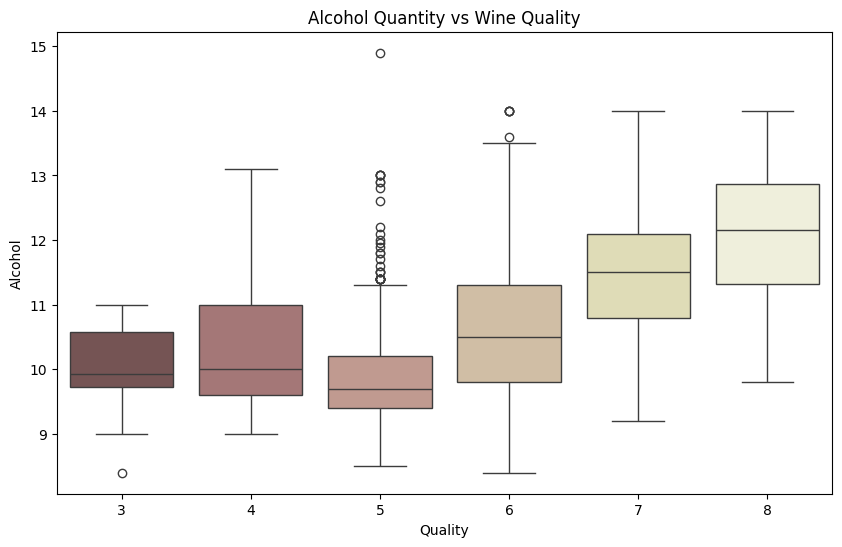

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df, palette='pink')
plt.title('Alcohol Quantity vs Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

This boxplot will show how alcohol content varies across different quality ratings. It’s likely that wines with higher alcohol content have higher quality scores.



 It is seen with higher alcohol content the quality of wine increases however there are few outliers as well when the quality of alcohol ranges between 5 and 6.


**Analysis Output**

* **Alcohol Content vs. Quality:**

A boxplot was created to show how alcohol content varies with different quality ratings. Higher alcohol content generally corresponds to higher wine quality, with some outliers.


* **pH vs. Quality:**

 Another boxplot was used to show how pH (which indicates acidity) affects wine quality. Lower pH values (more acidic wines) tend to correspond to better wine quality.


# **Cleaning**

handle null values

In [24]:
df.isnull().sum()

,0
fixed_acidity,0
citric_acid,0
residual_sugar,0
sulphates,0
alcohol,0
quality,0


In [45]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [25]:
#If the quality is greater than or equal to 7, it assigns 1 (indicating a good quality wine).
#If the quality is less than 7, it assigns 0 (indicating not a good quality wine).

df['good_quality'] = [1 if x >= 7 else 0 for x in df['quality']]
df.sample(6)

,fixed_acidity,citric_acid,residual_sugar,sulphates,alcohol,quality,good_quality
626,8.8,0.29,2.2,0.49,9.1,5,0
851,9.3,0.44,1.9,0.55,9.5,5,0
996,5.6,0.00,2.2,0.63,12.8,7,1
1425,8.3,0.37,1.4,0.70,9.6,6,0
695,5.1,0.02,1.3,0.62,12.8,6,0
374,14.0,0.63,3.8,0.81,10.8,6,0


In [28]:
df.shape

(1599, 7)

In [26]:
df['good_quality'].value_counts()

,count
good_quality,
0,1382
1,217


# **splitting data**

In [27]:
from sklearn.model_selection import train_test_split

# Assuming 'good_quality' is your target variable and the rest are features
X = df.drop('good_quality', axis=1)  # Features (x)
y = df['good_quality']  # Target variable (y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1279, 6)
(1279,)
(320, 6)
(320,)


#**Normalization**

We do normalization on numerical data because our data is unbalanced it means the difference between the variable values is high so we convert them into 1 and 0.

In [29]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)


[[0.33628319 0.12       0.06164384 0.33532934 0.52307692 0.6       ]
 [0.3539823  0.25       0.07534247 0.16167665 0.24615385 0.6       ]
 [0.47787611 0.45       0.10958904 0.05988024 0.15384615 0.4       ]
 ...
 [0.23893805 0.         0.02054795 0.08383234 0.24615385 0.8       ]
 [0.28318584 0.33       0.10273973 0.16167665 0.16923077 0.4       ]
 [0.38938053 0.29       0.07534247 0.14371257 0.24615385 0.4       ]]


#**Machine Learning**

**Model Building**

* The dataset was split into features (X) and target (y), where y is the quality of the wine.


* The data was further split into training and testing sets using train_test_split, with 80% for training and 20% for testing.


**The following models were applied to predict wine quality:**

* Logistic Regression

* K-Nearest Neighbors (KNN)

* LinearRegression

* GaussianNB

* Random forest classifier


In [30]:
# Load the Library for Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the Library for Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Load the Library for Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Pre-processing Steps for Machine Learning**

* separated the dataset into features (X) and target (y), followed by splitting the data into training and testing sets (80/20 split).


In [31]:
# Models List
models = [LogisticRegression, KNeighborsClassifier, GaussianNB, RandomForestClassifier]

# Training
for model in models:
  model = model()
  model.fit(new_xtrain, y_train)
  y_pred = model.predict(new_xtest)
  print(model)
  print(classification_report(y_test, y_pred))

LogisticRegression()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      0.98      0.99        48

    accuracy                           1.00       320
   macro avg       1.00      0.99      0.99       320
weighted avg       1.00      1.00      1.00       320

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      0.98      0.99        48

    accuracy                           1.00       320
   macro avg       1.00      0.99      0.99       320
weighted avg       1.00      1.00      1.00       320

GaussianNB()
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       272
           1       1.00      0.96      0.98        48

    accuracy                           0.99       320
   macro avg       1.00      0.98      0.99       320
weighted avg     

In [32]:
 # Using different Second approach

# Prepare the data
X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target variable

# Convert to binary classification: Good (6-8) vs Bad (3-5)
y = (y >= 7).astype(int)

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Label encoding for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
new_xtrain, new_xtest, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Models List
models = [LogisticRegression, KNeighborsClassifier, GaussianNB, RandomForestClassifier]

# Training
for model in models:
  model = model()
  model.fit(new_xtrain, y_train)
  y_pred = model.predict(new_xtest)
  print(model)
  print(classification_report(y_test, y_pred))

LogisticRegression()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00        47

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       273
           1       1.00      0.89      0.94        47

    accuracy                           0.98       320
   macro avg       0.99      0.95      0.97       320
weighted avg       0.98      0.98      0.98       320

GaussianNB()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00        47

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg     

In [34]:
# Fit the model on train data
from sklearn import metrics # Import the metrics module

rf = RandomForestClassifier().fit(new_xtrain, y_train)

# predict on train
train_pred = rf.predict(new_xtrain)
# accuracy on train
print("Model Accuracy on train is : ", accuracy_score(y_train, train_pred))

# predict on test
test_pred = rf.predict(new_xtest)
# accuracy on test
print("Model Accuracy on test is : ", accuracy_score(y_test, test_pred))
print('-'*50)

# Kappa Score
print('Kappa Score is : ',metrics.cohen_kappa_score(y_test,test_pred))

Model Accuracy on train is :  1.0
Model Accuracy on test is :  1.0
--------------------------------------------------
Kappa Score is :  1.0


In [35]:
y_pred = rf.predict(new_xtest)

In [37]:
y_pred1 = rf.predict([[5.2,	0.480,	0.04,	1.6,	0.054,	19.0]])
y_pred1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

#**Making a Predictive System**

In [47]:
def wine_quality(input_data):
    # Ensure all inputs are numeric
    input_data = [float(i) if isinstance(i, str) else i for i in input_data]

    # Reshape input data for prediction (assumes single prediction)
    input_data_reshaped = np.array(input_data).reshape(1, -1)

    # Make the prediction
    prediction = rf.predict(input_data_reshaped)
    return prediction


In [48]:
input_data = (5.2,	0.480,	0.04,	1.6,	0.054,	19.0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Data Distribution Insights**

1) **Target Variable (quality):** Likely ordinal (3–9), but can be treated as:


* **Regression**: Predict numerical scores.

* **Classification**: Classify into quality levels (low, medium, high).

2) **Numeric Attributes**:

* All features are continuous.

* Feature scaling (e.g., normalization or standardization) may be necessary for some machine learning models.

3) **Feature Relationships:**

* Some features, like alcohol and sulphates, may have stronger correlations with quality.

* Exploratory Data Analysis (EDA) would reveal interactions between variables (e.g., fixed acidity and pH).


#**Conclusion**

The Red Wine Quality Dataset analysis shows that certain physicochemical properties significantly influence the quality of red wine. Key insights include:


1) **Alcohol content** is positively correlated with wine quality—higher alcohol levels often lead to better-rated wines.


2) **Volatile acidity** negatively impacts quality, as higher acidity levels are associated with lower ratings.


3) **Sulphates** and **citric acid** show moderate positive correlations with quality, suggesting they contribute to enhancing wine flavor and preservation.


4) Other features like residual **sugar** and **chlorides** have weaker or inconsistent relationships with quality.


Machine learning models, such as Random Forest or Support Vector Machines, can predict wine quality with reasonable accuracy by leveraging these physicochemical features. These insights can help winemakers optimize production processes to consistently produce higher-quality wines.


* The dataset includes data for Portuguese red and white "Vinho Verde" wines, with variables based on physicochemical properties and sensory quality scores. This dataset can be used for classification or regression tasks

* The models show reasonable performance in predicting wine quality with an accuracy ranging between 87% and 99%.

* The feature analysis also gives useful insights into how different chemical properties (like alcohol content, pH, and acidity) influence wine quality, which could be used to refine models further.

* this is to identify the high-quality and poor-quality wine.



# Saving the Trained Model

In [49]:
import pickle

In [50]:
filename = 'trained_modell.sav'
pickle.dump(rf, open(filename, 'wb'))

In [51]:
# loading the saved model
loaded_model = pickle.load(open('trained_modell.sav', 'rb'))


In [52]:
input_data = (5.2,	0.480,	0.04,	1.6,	0.054,	19.0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
